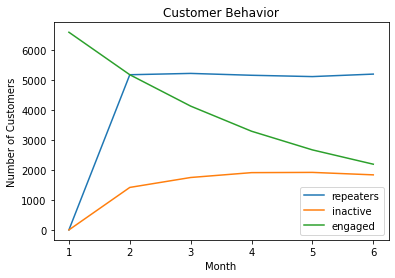

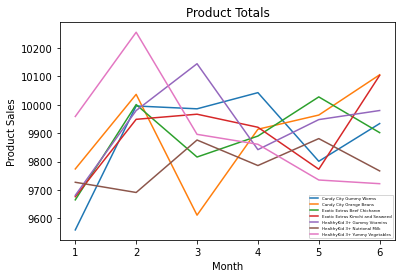

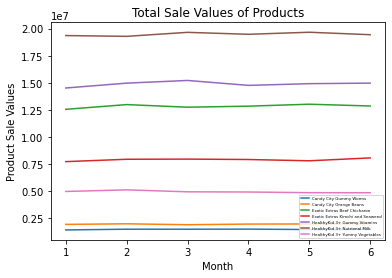

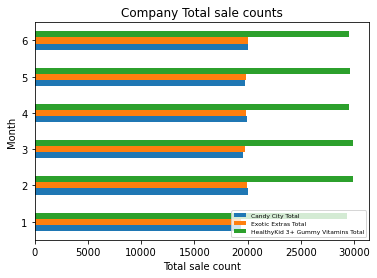

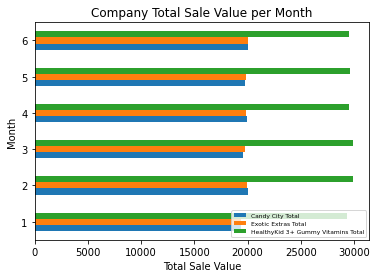

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = './transaction-data-adhoc-analysis.json'
df = pd.read_json(data_path)





'''PART ONE'''

## split transaction items
df["transaction_items"] = df["transaction_items"].str.split(";")

## give each item their own row
processed_df=df.explode("transaction_items")

## convert transaction dates to month
processed_df["month"] = pd.to_datetime(processed_df["transaction_date"]).dt.month

## function for getting item
def items(x):
    charset=[
        *[str(i) for i in range(10)]
    ]
    x="".join([i for i in x if i in charset])
    return int(x[-1])

## apply function to transaction items to get amount
processed_df["amount"]= processed_df["transaction_items"].apply(items)

## function for reformatting item names
def reformatting_item(a):
    format =""
    format += (a.replace(',',' ')[:a.find("(")-1])
    return format

## apply function
processed_df["transaction_items"]= processed_df["transaction_items"].apply(reformatting_item)

## get needed columns only
processed_df = processed_df[["name","transaction_items","amount","transaction_value","month"]]

items_table = pd.pivot_table(processed_df,index="month",columns="transaction_items",values="amount",aggfunc="sum")

## sum of each company
items_table['Candy City Total'] = items_table[['Candy City Gummy Worms','Candy City Orange Beans']].sum(axis=1)
items_table['Exotic Extras Total'] = items_table[['Exotic Extras Beef Chicharon','Exotic Extras Kimchi and Seaweed']].sum(axis=1)
items_table['HealthyKid 3+ Gummy Vitamins Total'] = items_table[['HealthyKid 3+ Gummy Vitamins','HealthyKid 3+ Nutrional Milk','HealthyKid 3+ Yummy Vegetables']].sum(axis=1)

items_table_sum = items_table[['Candy City Total','Exotic Extras Total','HealthyKid 3+ Gummy Vitamins Total']]

## dataframe for value per item
items_value_table = items_table.copy()

items_value_table['Candy City Gummy Worms'] = items_table.iloc[:,0]*150
items_value_table['Candy City Orange Beans'] = items_table.iloc[:,1]*199
items_value_table['Exotic Extras Beef Chicharon'] = items_table.iloc[:,2]*1299
items_value_table['Exotic Extras Kimchi and Seaweed'] = items_table.iloc[:,3]*799
items_value_table['HealthyKid 3+ Gummy Vitamins'] = items_table.iloc[:,4]*1500
items_value_table['HealthyKid 3+ Nutrional Milk'] = items_table.iloc[:,5]*1990
items_value_table['HealthyKid 3+ Yummy Vegetables'] = items_table.iloc[:,6]*500

items_value_table['Candy City Total'] = items_value_table[['Candy City Gummy Worms','Candy City Orange Beans']].sum(axis=1)
items_value_table['Exotic Extras Total'] = items_value_table[['Exotic Extras Beef Chicharon','Exotic Extras Kimchi and Seaweed']].sum(axis=1)
items_value_table['HealthyKid 3+ Gummy Vitamins Total'] = items_value_table[['HealthyKid 3+ Gummy Vitamins','HealthyKid 3+ Nutrional Milk','HealthyKid 3+ Yummy Vegetables']].sum(axis=1)

items_value_sum = items_table[['Candy City Total','Exotic Extras Total','HealthyKid 3+ Gummy Vitamins Total']]



'''PART TWO'''

## new pivot table for users data
pivot_table_users = pd.pivot_table(processed_df,index="name",columns="month",values="amount",aggfunc="sum")

## replace nan values
pivot_table_users.replace(np.nan,"",regex=True,inplace=True)

## function to change table to true and false
def did_order(x):
    if x == "":
        return False
    else:
        return True

## apply function to all values
pivot_table_users = pivot_table_users.applymap(did_order)

## make column names referenceable strings
pivot_table_users.columns = ['1','2','3','4','5','6']

#make copies of the table to check for each type
pivot_table_users_repeaters = pivot_table_users.copy()
pivot_table_users_inactive = pivot_table_users.copy()
pivot_table_users_engaged = pivot_table_users.copy()

## fixing repeaters data
pivot_table_users_repeaters['2'] = np.where((pivot_table_users['1'] == True) & 
                                          (pivot_table_users['2'] == True),
                                          1,np.nan)

pivot_table_users_repeaters['3'] = np.where((pivot_table_users['2'] == True) & 
                                          (pivot_table_users['3'] == True),
                                          1,np.nan)

pivot_table_users_repeaters['4'] = np.where((pivot_table_users['3'] == True) & 
                                          (pivot_table_users['4'] == True),
                                          1,np.nan)

pivot_table_users_repeaters['5'] = np.where((pivot_table_users['4'] == True) & 
                                          (pivot_table_users['5'] == True),
                                          1,np.nan)

pivot_table_users_repeaters['6'] = np.where((pivot_table_users['5'] == True) & 
                                          (pivot_table_users['6'] == True),
                                          1,np.nan)

pivot_table_users_repeaters['1'] = np.nan

## dataframe with repeaters data
repeaters_df = pd.DataFrame(pivot_table_users_repeaters.count(), columns=['repeaters'])


## fixing inactive table
pivot_table_users_inactive['1'] = np.nan

pivot_table_users_inactive['2'] = np.where((pivot_table_users['2'] ==0) &
                                            (pivot_table_users['1'] >= 1),
                                           1,np.nan)

pivot_table_users_inactive['3'] = np.where((pivot_table_users['3'] == 0) & 
                                           ((pivot_table_users['2'] >=1)|
                                            (pivot_table_users['1'] >= 1)),
                                           1,np.nan)

pivot_table_users_inactive['4'] = np.where((pivot_table_users['4'] == 0) &
                                            ((pivot_table_users['3'] >= 1) |
                                           (pivot_table_users['2'] >=1)|
                                            (pivot_table_users['1'] >= 1)),
                                           1,np.nan)

pivot_table_users_inactive['5'] = np.where((pivot_table_users['5'] == 0) &
                                           ((pivot_table_users['4'] >= 1) |
                                            (pivot_table_users['3'] >= 1) |
                                            (pivot_table_users['2'] >=1)|
                                            (pivot_table_users['1'] >= 1)),
                                           1,np.nan)

pivot_table_users_inactive['6'] = np.where(pivot_table_users['6'] == 0 &
                                           ((pivot_table_users['5'] >= 1) |
                                            (pivot_table_users['4'] >= 1) |
                                            (pivot_table_users['3'] >= 1) |
                                            (pivot_table_users['2'] >= 1) |
                                            (pivot_table_users['1'] >= 1)),
                                           1,np.nan)

inactive_df = pd.DataFrame(pivot_table_users_inactive.count(), columns=['inactive'])

## data frame with inactive data
inactive_df = pd.DataFrame(pivot_table_users_inactive.count(), columns=['inactive'])


## fixing engaged table
pivot_table_users_engaged['1'] = np.where(pivot_table_users['1'] == True,1,np.nan)

pivot_table_users_engaged['2'] = np.where((pivot_table_users['1'] == True) & 
                                          (pivot_table_users['2'] == True),
                                          1,np.nan)

pivot_table_users_engaged['3'] = np.where((pivot_table_users['1'] == True) & 
                                          (pivot_table_users['2'] == True) & 
                                          (pivot_table_users['3'] == True),
                                          1,np.nan)

pivot_table_users_engaged['4'] = np.where((pivot_table_users['1'] == True) &
                                          (pivot_table_users['2'] == True) &
                                          (pivot_table_users['3'] == True) &
                                          (pivot_table_users['4'] == True),
                                          1,np.nan)

pivot_table_users_engaged['5'] = np.where((pivot_table_users['1'] == True) &
                                          (pivot_table_users['2'] == True) &
                                          (pivot_table_users['3'] == True) &
                                          (pivot_table_users['4'] == True) &
                                          (pivot_table_users['5'] == True),
                                          1,np.nan)

pivot_table_users_engaged['6'] = np.where((pivot_table_users['1'] == True) &
                                          (pivot_table_users['2'] == True) &
                                          (pivot_table_users['3'] == True) &
                                          (pivot_table_users['4'] == True) &
                                          (pivot_table_users['5'] == True) &
                                          (pivot_table_users['6'] == True),
                                          1,np.nan)
## data frame with enagaged data
engaged_df = pd.DataFrame(pivot_table_users_engaged.count(), columns=['engaged'])



#merge all data together and transpose
summarized_users_df = repeaters_df.merge(inactive_df,how = 'left',left_index = True, right_index = True).merge(engaged_df,how = 'left',left_index = True, right_index = True).transpose()




#final dataframe list
items_table
items_value_table
summarized_users_df




#dataframes plotted
plt.plot(summarized_users_df.columns, summarized_users_df.loc['repeaters'], label = "repeaters")
plt.plot(summarized_users_df.columns, summarized_users_df.loc['inactive'], label = "inactive")
plt.plot(summarized_users_df.columns, summarized_users_df.loc['engaged'], label = "engaged")

plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer Behavior')
plt.legend()
plt.show()



plt.plot(items_table.index, items_table['Candy City Gummy Worms'], label = "Candy City Gummy Worms")
plt.plot(items_table.index, items_table['Candy City Orange Beans'], label = "Candy City Orange Beans")
plt.plot(items_table.index, items_table['Exotic Extras Beef Chicharon'], label = "Exotic Extras Beef Chicharon")
plt.plot(items_table.index, items_table['Exotic Extras Kimchi and Seaweed'], label = "Exotic Extras Kimchi and Seaweed")
plt.plot(items_table.index, items_table['HealthyKid 3+ Gummy Vitamins'], label = "HealthyKid 3+ Gummy Vitamins")
plt.plot(items_table.index, items_table['HealthyKid 3+ Nutrional Milk'], label = "HealthyKid 3+ Nutrional Milk")
plt.plot(items_table.index, items_table['HealthyKid 3+ Yummy Vegetables'], label = "HealthyKid 3+ Yummy Vegetables")

plt.xlabel('Month')
plt.ylabel('Product Sales')
plt.title('Product Totals')
plt.legend(loc = 4, prop={'size': 4})
plt.show()



plt.plot(items_value_table.index, items_value_table['Candy City Gummy Worms'], label = "Candy City Gummy Worms")
plt.plot(items_value_table.index, items_value_table['Candy City Orange Beans'], label = "Candy City Orange Beans")
plt.plot(items_value_table.index, items_value_table['Exotic Extras Beef Chicharon'], label = "Exotic Extras Beef Chicharon")
plt.plot(items_value_table.index, items_value_table['Exotic Extras Kimchi and Seaweed'], label = "Exotic Extras Kimchi and Seaweed")
plt.plot(items_value_table.index, items_value_table['HealthyKid 3+ Gummy Vitamins'], label = "HealthyKid 3+ Gummy Vitamins")
plt.plot(items_value_table.index, items_value_table['HealthyKid 3+ Nutrional Milk'], label = "HealthyKid 3+ Nutrional Milk")
plt.plot(items_value_table.index, items_value_table['HealthyKid 3+ Yummy Vegetables'], label = "HealthyKid 3+ Yummy Vegetables")

plt.xlabel('Month')
plt.ylabel('Product Sale Values')
plt.title('Total Sale Values of Products')
plt.legend(loc = 4, prop={'size': 4})
plt.show()



items_table_sum.plot.barh()

plt.xlabel('Total sale count')
plt.ylabel('Month')
plt.title('Company Total sale counts')
plt.legend(loc = 4, prop={'size': 6})
plt.show()



items_value_sum.plot.barh()

plt.xlabel('Total Sale Value')
plt.ylabel('Month')
plt.title('Company Total Sale Value per Month')
plt.legend(loc = 4, prop={'size': 6})
plt.show()